# Выявление закономерностей успешности видео игр

<a name="1common."></a>
## <a name="0.0"></a>Содержание:
* [Подгрузка библиотек и самописные функции](#0.)
* [Загрузка данных](#1.)
* [Предобработка данных](#2.)
* [Исследовательский анализ](#3.)
* [Портрет пользователя каждого региона](#4.)
* [Проверка гипотез](#5.)
* [Общий вывод и рекомендации](#6.)

## Описание проекта:

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) о 2016 года.
Необходимо выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

*В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».*

*Данные за 2016 год могут быть неполными.*

## Описание данных:
* *Name*— название игры
* *Platform* — платформа
* *Year_of_Release* — год выпуска
* *Genre* — жанр игры
* *NA_sales* — продажи в Северной Америке (миллионы долларов)
* *EU_sales* — продажи в Европе (миллионы долларов)
* *JP_sales* — продажи в Японии (миллионы долларов)
* *Other_sales* — продажи в других странах (миллионы долларов)
* *Critic_Score* — оценка критиков (максимум 100)
* *User_Score* — оценка пользователей (максимум 10)
* *Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).

## Подгрузка библиотек и самописные функции
<a name="0."></a>
[<font size="2">(к содержанию)</font>](#1common.)

In [72]:
#Импортируем все необходимые библиотеки
import pandas as pd
import numpy as np
from scipy import stats as st
from termcolor import colored
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
from plotly.subplots import make_subplots

In [73]:
#Определяем болд
def bold(): 
    return "\033[1m"

def bold_end(): 
    return "\033[0m"

#Ставим формат для нумериков
pd.options.display.float_format = '{: >10.2f}'.format

In [74]:
# __Функция print_basic_info__, для вывода информации о массиве, и его переменных.

# 4 входных параметра:

# * *base* - название базы данных
# * *info* - 1: вывод информации о массиве, другое: не вывод
# * *head* - n: вывод примера базы (вывод n - строк), n < 1: не вывод
# * *describe* - 1: вывод описания переменных массива, другое: не вывод

def print_basic_info(base, info, head, describe):
    if info == 1:
        print(bold(), colored('info','green'), bold_end(), "\n")
        print( base.info())  
    if head >= 1:
        print(bold(),colored('head','green'),bold_end(),"\n")
        display(base.head(head))
    if describe == 1:
        for i in base.columns:
            print(bold(), colored(i,'blue'),bold_end(), "\n", base[i].unique())

In [75]:
#__Функция ft_namecount__, для вывода названия переменной, частотной нормированной таблицы и описания переменной.

#5 входных параметров:

#* *base* - название базы данных
#* *index* - название переменной в базе
#* *table* - 1: вывод частотной нормированной таблицы, 0: не вывод
#* *sort* - 1: сортировка таблицы по лейблам переменной, 0: не сортировка
#* *describe* - 1: вывод описания переменной, 0: не вывод

def ft_name_count (base, name , table, sort, describe):
    print(bold(), colored(name,'blue') , bold_end(), "\n")
    if table != 0:
        s = (base[name].value_counts(normalize=True))
        if sort != 0:
            s.sort_index(inplace=True)
        print(s)
    if describe != 0:
        print(base[name].describe())

In [76]:
#Достаем файлы
df_games = pd.read_csv('datasets/games.csv', sep=',',decimal='.')

## Загрузка данных
<a name="1."></a>
[<font size="2">(к содержанию)</font>](#1common.)

In [77]:
print_basic_info(df_games,1,3,0)

 info  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
 head  



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E


In [78]:
# Проверим уникальность названия игр
ft_name_count(df_games[df_games["Name"].isnull() == False],"Name", 0,0,1)

# Проверим одни и теже пропуски в Genre и Name
print_basic_info(df_games[df_games["Name"].isnull() == True],1,0,0)

 Name  

count                           16713
unique                          11559
top       Need for Speed: Most Wanted
freq                               12
Name: Name, dtype: object
 info  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 659 to 14244
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             0 non-null      object 
 1   Platform         2 non-null      object 
 2   Year_of_Release  2 non-null      float64
 3   Genre            0 non-null      object 
 4   NA_sales         2 non-null      float64
 5   EU_sales         2 non-null      float64
 6   JP_sales         2 non-null      float64
 7   Other_sales      2 non-null      float64
 8   Critic_Score     0 non-null      float64
 9   User_Score       0 non-null      object 
 10  Rating           0 non-null      object 
dtypes: float64(6), object(5)
memory usage: 192.0+ bytes
None


### Вывод:

Всего 16715 кейсов. 

__!Название игры не уникально.__
Это значит, что игры выходили на разных платформах и что может быть несколько игр с одинаковым названием.

__План предобработки по массиву:__

___Пропуски:___

*Name* (название игры) и *Genre* (жанр игры) - 2 пропуска (одни и те же кейсы). 
* Возможно названия не подгрузились, т.к. в них были специфические символы или же игры не имели названия на момент выгрузки. 
* Предположительно жанр игры определяется на основе названия, поэтому не подгрузился.
* Предположить названия не сможем. Пропусков мало. Пропуски удаляем.

*Year_of_Release* (год выпуска) - 263 пропуска. 
* Точный год выпуска не известен. Вероятно данные вводились в таблицу в ручную и информации по данным играм небыло или они были аналогичные, предыдущей строке. Если одна и также игра забивалась подряд несколько раз.
* Можем предположить и заполнить год выпуска, если данная игра выходила на других платформах и год известен.

*Critic_Score, User_Score и Rating* — пропусков почти половина! (8578,6701 и 6764 кейсов соответственно)
* Возможно рейтинги стали считаться не сразу, а с определенных годов? Если да, восстановить не сможем.
* Возможно данные из нескольких источников, например для разных Platform или информация из различных баз данных и в некоторых источниках информация не была указана. Однако заполнить не сможем. Т.к платформа может сильно влиять на рейтинг. Это другой опыт игры.
* Рейтинги можем попробовать заполнить, если игры выпускались на других платформах и по ним есть информация о нем.

___Странные значения:___

*User_Score*  -  tbd - это еще не которые не набрали достаточное количество оценок игры для составления рейтинга аудитории. 

___Некорректные типы:___

*User_Score* (оценка пользователей (максимум 10) - тип обьект. Необходимо сделать флоат.

*Year_of_Release* - сейчас флоат. Приведем к инту.

## Предобработка данных
<a name="2."></a>
[<font size="2">(к содержанию)</font>](#1common.)

___Замените названия столбцов (приведите к нижнему регистру).___

In [79]:
df_games.columns = df_games.columns.str.lower()

#проверяем
print(df_games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


___Обработайте пропуски при необходимости.___

* name (название игры) и genre (жанр игры) 

In [80]:
# Сколько пропусков
print("Пропусков", df_games[((df_games["name"].isnull() == True) | (df_games[
    "genre"].isnull() == True))]['platform'].count())

# Смотрим
display(df_games[((df_games["name"].isnull() == True) | (df_games[
    "genre"].isnull() == True))].head())

Пропусков 2


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,nan,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,nan,NaN,NaN


In [81]:
# Предположить не сможем. Пропусков всего 2. Не целевой год (2016). Пропуски удаляем.
df_games.dropna(subset = ['name'], inplace = True)

# Проверка
print("Пропусков", df_games[((df_games["name"].isnull() == True) | 
                             (df_games["genre"].isnull() == True))]['genre'].count())

Пропусков 0


* year_of_release (год выпуска)

Проверим, есть ли информация по году в этой игре, но на других кейсах. Если дубли - возьмем максимальный год

In [82]:
print("Пропусков", df_games[df_games["year_of_release"].isnull() == True]['name'].count())

Пропусков 269


In [83]:
#делаем словарь с уникальным именем
pivot = df_games[df_games["year_of_release"].isnull() == False].pivot_table(index=
    'name', values='year_of_release', aggfunc='max')
pivot = pivot.reset_index()

def pv(i):
    return (pivot.query('name == @i')['year_of_release'].sum())

def year_fill(x):
    name = x['name']
    year_of_release = x['year_of_release']
    if (pd.isnull(year_of_release)):
            if pv(name) > 0:
                return pv(name)
    return year_of_release

#применяем
df_games['year_of_release'] = df_games.apply(year_fill, axis=1)

#проверяем
print("Пропусков", df_games[df_games["year_of_release"].isnull() == True]['name'].count())

Пропусков 146


Пропуски остались. 

Посмотрим один скейс. В названии уже есть дата.

Найдем такие игры и посмотрим закономерности.<br>
Гипотеза в том, что игры с годом обычно выпускаются за год, до указанного года.

In [84]:
#пример кейса
display(df_games.loc[475])

name               wwe Smackdown vs. Raw 2006
platform                                  PS2
year_of_release                           NaN
genre                                Fighting
na_sales                                 1.57
eu_sales                                 1.02
jp_sales                                 0.00
other_sales                              0.41
critic_score                              NaN
user_score                                NaN
rating                                    NaN
Name: 475, dtype: object

In [85]:
#вытаскиваем цифры
df_games['temp_year'] = df_games['name'].str.extract('([0-9]+)')

#убираем менее 1980 года и более 2007
df_games["temp_year"] = df_games["temp_year"].astype("float")
df_games['temp_year'] = df_games['temp_year'].where(((df_games[
    'temp_year'] <= 2007) & (df_games['temp_year'] >= 1980)  ), None )

#проверяем
df_games["temp_year"] = df_games["temp_year"].astype("float")
df_games[df_games["temp_year"].isnull() == False]['temp_year'].describe()

count       406.00
mean       2002.94
std           2.16
min        1996.00
25%        2001.00
50%        2003.00
75%        2005.00
max        2007.00
Name: temp_year, dtype: float64

In [86]:
#смотрим разницу между годом релиза и датой. 

print((df_games[(df_games["temp_year"].isnull() == False) & (df_games[
    "year_of_release"].isnull() == False) ]['temp_year'] - df_games[(df_games[
    "temp_year"].isnull() == False) & (df_games[
    "year_of_release"].isnull() == False) ][
    'year_of_release']).value_counts(normalize=True).head(2))

1.00         0.63
0.00         0.30
dtype: float64


Средняя разница между годом в названии и годом релиза в большенстве случаев 1 год.

Попробуем заполнить пропуски

In [87]:
#меняем функцию
def year_fill(x):
    name = x['name']
    year_of_release = x['year_of_release']
    temp_year= x['temp_year']
    if (pd.isnull(year_of_release)):
        return temp_year
    return year_of_release

#применяем
df_games['year_of_release'] = df_games.apply(year_fill, axis=1)

#проверяем
df_games.drop(['temp_year'], axis=1, inplace = True)
print("Пропусков", df_games[df_games["year_of_release"].isnull() == True]['name'].count())

Пропусков 140


Посмотрим корреляции

Возможно в какие-то года были модны жанры (genre) или платформы (platform). 
Для этого переведем категориальные переменные в позиционные переменные

In [88]:
for k in df_games['platform'].unique():
    df_games['platform_'+str(k)] = df_games['platform'] == k

In [89]:
for k in df_games['genre'].unique():
    df_games['genre_'+str(k)] = df_games['genre'] == k

In [90]:
for k in df_games['rating'].unique():
    df_games['rating_'+str(k)] = df_games['rating'] == k

Посмотрим корреляцию

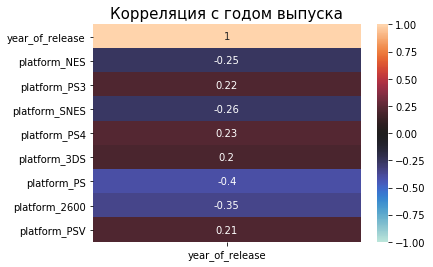

In [91]:
corr = df_games.corr()
y = ['year_of_release']
x = []
for i in corr.columns:
    if (corr.loc[i,'year_of_release'] > 0.19) | (corr.loc[i,'year_of_release'] < -0.19) :
        x.append(i)

corr = corr.loc[x,y]

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.index,
            center=0, annot=True, vmin=-1, vmax=1 )
plt.title("Корреляция с годом выпуска", fontsize=15)
plt.show()

Нет сильных связей. 
Есть связь с платформами. т.к. они были выпущены в определенный промежуток времени и далее устаревали.
Заполним медианным годом для этих платформ.

In [92]:
# делаем словарь
dict_p = {'PS3':(df_games.query('platform_PS3 == True')['year_of_release'].median()),
          'PS4':(df_games.query('platform_PS4 == True')['year_of_release'].median()),
          '3DS':(df_games.query('platform_3DS == True')['year_of_release'].median()),
          'PSV':(df_games.query('platform_PSV == True')['year_of_release'].median()),
          'PS':(df_games.query('platform_PS == True')['year_of_release'].median()),
          '2600':(df_games.query('platform_2600 == True')['year_of_release'].median())
         }

#меняем функцию
def year_fill(x):
    year_of_release = x['year_of_release']
    platform= x['platform']
    if (pd.isnull(year_of_release)):
        try:
            return dict_p[platform]
        except:
            return None
    return year_of_release

#применяем
df_games['year_of_release'] = df_games.apply(year_fill, axis=1)

#проверяем
print("Пропусков", df_games[df_games["year_of_release"].isnull() == True]['name'].count())

Пропусков 100


Оставшиеся пропуски удалим.

In [93]:
#выкидывай
df_games.dropna(subset = ['year_of_release'], inplace = True)

#проверяем
print("Пропусков", df_games[df_games["year_of_release"].isnull() == True]['name'].count())

Пропусков 0


* user_score

Посмотрим на ТБД. Уберем ТБД в Пропуски

Поищим связи на основании чего можно будет заполнть рейтинги

In [94]:
print(df_games[df_games["user_score"]== 'tbd'][
    'year_of_release'].value_counts(normalize=True).head(10))

2009.00         0.17
2010.00         0.14
2008.00         0.14
2011.00         0.09
2002.00         0.08
2007.00         0.08
2006.00         0.05
2005.00         0.05
2004.00         0.04
2003.00         0.04
Name: year_of_release, dtype: float64


In [95]:
#делаем переменную
df_games['user_score_tbd'] = df_games["user_score"] == 'tbd'

#таких 14% от выборки много.
df_games['user_score_tbd'].mean()

0.14434479022452296

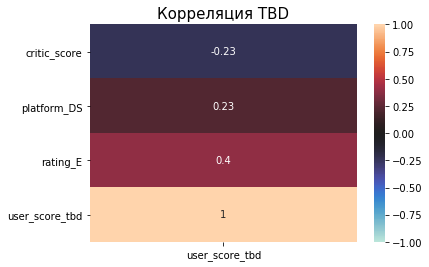

In [96]:
#посмотрим с чем есть корреляция

corr = df_games.corr()
y = ['user_score_tbd']
x = []
for i in corr.columns:
    if (corr.loc[i,'user_score_tbd'] > 0.19) | (corr.loc[i,'user_score_tbd'] < -0.19) :
        x.append(i)

corr = corr.loc[x,y]

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.index,
            center=0, annot=True, vmin=-1, vmax=1 )
plt.title("Корреляция TBD", fontsize=15)
plt.show()

Найдена обратная связь с оценкой критиков.
Если критики плохо оценивают игру - меньше игроков купят ее.

Также есть связь с рейтингом.
Рейтинг E - для всех. И следовательно больше людей могут оценить игру и следовательно оценок больше.

Выделим группу незаполненного рейтинга и Уберем метку ТБД в пропуски в переменной user_score

In [97]:
df_games["user_score_nan"] = df_games['user_score'].isnull()

df_games['user_score'] = df_games['user_score'].where(df_games['user_score'] != 'tbd', None)
df_games["user_score"] = df_games["user_score"].astype("float")

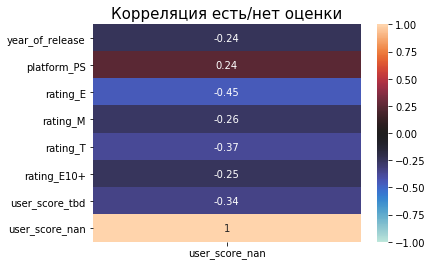

In [98]:
#посмотрим с чем есть корреляция
corr = df_games.corr()
y = ['user_score_nan']
x = []
for i in corr.columns:
    if (corr.loc[i,'user_score_nan'] > 0.19) | (corr.loc[i,'user_score_nan'] < -0.19) :
        x.append(i)

corr = corr.loc[x,y]

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.index,
            center=0, annot=True, vmin=-1, vmax=1 )
plt.title("Корреляция есть/нет оценки", fontsize=15)
plt.show()

Найдена слабая обратная связь с годом.
Вполне логично, что чем раньше была выпущена игра - тем больше раз ее оценили и следовательно оценок достойно,  чтобы посчитать оценку юзеров достаточно достоверно (предположительно это среднее, уровень достаточной выборки не известен. Ведь не все купившие игру ее оценивают)  

Также есть связь с рейтингом.
Рейтинг E - для всех. И следовательно больше людей могут оценить игру и следовательно оценок больше.

__Оставляем пропуски. Заполнить на основании имени игры и оценок в других платформах не можем. Т.к платформа может сильно влиять на рейтинг. Это другой опыт игры + при адаптации могут быть проблемы влияющие на рейтиг отрицательно.__

* critic_score

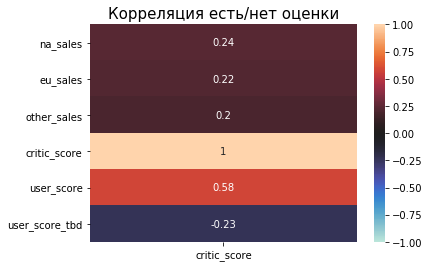

In [99]:
#посмотрим с чем есть корреляция
corr = df_games.corr()
y = ['critic_score']
x = []
for i in corr.columns:
    if (corr.loc[i,'critic_score'] > 0.19) | (corr.loc[i,'critic_score'] < -0.19) :
        x.append(i)

corr = corr.loc[x,y]

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.index,
            center=0, annot=True, vmin=-1, vmax=1 )
plt.title("Корреляция есть/нет оценки", fontsize=15)
plt.show()

__Оставляем пропуски. Заполнить на основании имени игры и оценок в других платформах не можем. Т.к платформа может сильно влиять на рейтинг. Это другой опыт игры + при адаптации могут быть проблемы влияющие на рейтиг отрицательно.__

<font color='blue'> 
__В другой ситуации можно было бы попробовать заполнить переменные critic_score и user_score  на основание друг друга. Т.к. корреляция сильная. Однако это кажется контрпродуктивным. Одна из задач сравнение корреляции данных рейтингов с объёмом продаж и мы можем исказить данные.__</font>

* rating

In [100]:
ft_name_count(df_games,"rating", 1,1,0)
print("Пропусков", df_games[df_games["rating"].isnull() == True]['name'].count())

 rating  

AO           0.00
E            0.40
E10+         0.14
EC           0.00
K-A          0.00
M            0.16
RP           0.00
T            0.30
Name: rating, dtype: float64
Пропусков 6726


Можем заполнить информацию, если данные есть игра выпускалась на другой платформе.

In [101]:
#делаем словарь с уникальным именем
pivot = df_games[df_games["rating"].isnull() == False].pivot_table(index= [
    'name','rating'], values='year_of_release', aggfunc='count')
pivot = pivot.reset_index()

#оставим только нужные
list_r = df_games[df_games["rating"].isnull() == True]['name']
pivot = pivot.query('name in @list_r')
pivot = pivot.reset_index()
pivot.drop(['index'], axis=1, inplace = True)

In [102]:
def pv(i):
    for p in range(len(pivot)):
        if pivot.loc[p,'name'] == i:
            return(pivot.loc[p,'rating'])

def rating_fill(x):
    name = x['name']
    rating = x['rating']
    if (pd.isnull(rating)):
        return pv(name)
    return rating

#применяем
df_games['rating'] = df_games.apply(rating_fill, axis=1)

In [103]:
print("Пропусков", df_games[df_games["rating"].isnull() == True]['name'].count())

Пропусков 6289


Около 400 игр. Больше не осталось? Найдем в словаре  pivot наши пропуски.

In [104]:
list_r = pivot['name']

print(df_games[df_games["rating"].isnull() == True].query('name in @list_r')['name'].count())

0


__Оставляем как есть. Пропуски. Данные взять неоткуда__

___Преобразуйте данные в нужные типы.___

In [105]:
df_games["year_of_release"] = df_games["year_of_release"].astype("int")

#Выкенем рабочие переменные, которые наплодили
df_games = df_games.drop(['platform_Wii' ,'platform_NES' ,
'platform_GB'  ,'platform_DS'  ,'platform_X360','platform_PS3' ,
'platform_PS2' ,'platform_SNES','platform_GBA' ,'platform_PS4' ,'platform_3DS' ,'platform_N64' ,'platform_PS'  ,'platform_XB'  ,'platform_PC'  ,'platform_2600','platform_PSP' ,'platform_XOne','platform_WiiU','platform_GC' ,'platform_GEN' ,'platform_DC'  ,'platform_PSV' ,'platform_SAT' ,'platform_SCD' ,'platform_WS'  ,'platform_NG'  ,'platform_TG16','platform_3DO' ,'platform_GG'  ,'platform_PCFX','genre_Sports' ,'genre_Platform','genre_Racing' ,'genre_Role-Playing','genre_Puzzle' ,'genre_Misc'  ,'genre_Shooter','genre_Simulation','genre_Action' ,'genre_Fighting','genre_Adventure','genre_Strategy','rating_E'     ,'rating_nan'   ,'rating_M'     ,'rating_T'     ,
'rating_E10+'  ,'rating_K-A'  , 'rating_AO', 'rating_EC','rating_RP','user_score_nan'], axis=1)
#проверяю
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16613 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16613 non-null  object 
 1   platform         16613 non-null  object 
 2   year_of_release  16613 non-null  int64  
 3   genre            16613 non-null  object 
 4   na_sales         16613 non-null  float64
 5   eu_sales         16613 non-null  float64
 6   jp_sales         16613 non-null  float64
 7   other_sales      16613 non-null  float64
 8   critic_score     8090 non-null   float64
 9   user_score       7555 non-null   float64
 10  rating           10324 non-null  object 
 11  user_score_tbd   16613 non-null  bool   
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 1.5+ MB



* Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [106]:
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games[
    'jp_sales'] + df_games['other_sales'] 
         
ft_name_count(df_games,"na_sales", 0,0,1)
ft_name_count(df_games,"eu_sales", 0,0,1)
ft_name_count(df_games,"jp_sales", 0,0,1)
ft_name_count(df_games,"other_sales", 0,0,1)
ft_name_count(df_games,"total_sales", 0,0,1)

 na_sales  

count     16613.00
mean          0.26
std           0.82
min           0.00
25%           0.00
50%           0.08
75%           0.24
max          41.36
Name: na_sales, dtype: float64
 eu_sales  

count     16613.00
mean          0.15
std           0.50
min           0.00
25%           0.00
50%           0.02
75%           0.11
max          28.96
Name: eu_sales, dtype: float64
 jp_sales  

count     16613.00
mean          0.08
std           0.31
min           0.00
25%           0.00
50%           0.00
75%           0.04
max          10.22
Name: jp_sales, dtype: float64
 other_sales  

count     16613.00
mean          0.05
std           0.19
min           0.00
25%           0.00
50%           0.01
75%           0.03
max          10.57
Name: other_sales, dtype: float64
 total_sales  

count     16613.00
mean          0.54
std           1.55
min           0.00
25%           0.06
50%           0.17
75%           0.47
max          82.54
Name: total_sales, dtype: float64


### Вывод

* Привели названия столбцов к нижнему регистру 

* Заполнили пропуски в year_of_release(год выпуска) на основании информации из названия игры. <br>
Незаполненные кейсы удалили.

* Частично на основании информации из названия игры удалось заполнить рейтинг от организации ESRB.  <br>
Однако в нем остались пропуски. 

* В переменных critic_score*(оценка критиков (максимум 100))* и user_score*(оценка пользователей (максимум 10))* оставляем пропуски. <br>


__Заполнить на основании имени игры и оценок в других платформах не можем. т.к платформа может сильно влиять на рейтинг. Это другой опыт игры + при адаптации могут быть например проблемы влияющие на рейтинг отрицательно.__


<font color='blue'> 
__В другой ситуации можно было бы попробовать заполнить переменные critic_score и user_score  на основание друг друга. Т.к. корреляция сильная. Однако это кажется контрпродуктивным. Одна из задач сравнение корреляции данных рейтингов с объёмом продаж и мы можем исказить данные.__</font>

В столбце user_score вариант tbd заменили на Nan т.к. по данному показателю еще не которые не набрали достаточное количество оценок игры для составления рейтинга аудитории. Чтобы не потерять информацию, если в будущем она будет нужна создали соответствующий булевый столбец.

* Посчитали суммарные продажи во всех регионах и записали в столбец total_sales

* Преобразовали year_of_release(год выпуска) из флота в инт.



## Исследовательский анализ данных
<a name="3."></a>
[<font size="2">(к содержанию)</font>](#1common.)

___Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?___

In [107]:
df_games['n_games'] = 1
data = df_games.pivot_table(index='year_of_release', values='n_games', aggfunc='count')
data  = data.reset_index()

fig = px.bar(data,x = 'year_of_release', y ='n_games', color='year_of_release',
             labels={'n_games':'Количество выпущенных игр',
                     'year_of_release':'Год выпуска игры'}, 
             title = "Сколько игр выпускалось в разные годы ?", height=350)
fig.show()

Данные за все периоду важны для понимания общей динамики, однако в рамках задачи необходимо сфокусироваться на общем тренде уменьшения количества игр начатого в 2012 году.

С 1980 до начала 2000 ных года рынок игр активно рос.
Вероятно рынок перенасыщен различными играми в 2005 - 2010 годах с высокой конкуренцией, что привело к тенденции уменьшения количества выпускаемых игр, в пользу нескольких имеющих необходимость выделятся через инновационный коцепт, графику или сюжет. 
А также появились смартфоны с огромным количеством игр

___Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?___

In [108]:
table = df_games.pivot_table(index='platform', values='total_sales', aggfunc='sum')
table2 = df_games.pivot_table(index='platform', values=
                              'year_of_release', aggfunc=['min','max'])

table2['diff'] = table2['max'] - table2['min']

table2.columns = ['year_of_release_min','year_of_release_max', 'diff']

table  = table.join(table2)
table  = table.reset_index()

table = table.sort_values(by = 'total_sales', ascending = False).head(15)

In [109]:
list_s = table["platform"]

data = df_games.query('platform in @list_s')
data = data.pivot_table(index=['platform','year_of_release'], values=
                        'total_sales', aggfunc='sum')

data  = data.reset_index()


fig = px.bar(data,x = 'year_of_release', y ='total_sales', color='platform' ,
             labels={'total_sales':'Продажи в год',
                     'year_of_release':'Год выпуска игры'}, 
             title = "Топ 15 платформ по продажам", height=350)
fig.show()

print(bold(), 'Популярные платформы активны в среднем', int(round(table[
    'diff'].mean(),0)) , 'лет (',int(round(table['diff'].mean() - np.std(table[
    'diff'], ddof=1),0)), 'до', int(round(table[
    'diff'].mean() + np.std(table['diff'], ddof=1),0)), 'лет)',  bold_end())

 Популярные платформы активны в среднем 12 лет ( 4 до 19 лет) 


In [110]:
table  = table.reset_index()

In [111]:
table = table.drop(['total_sales','index'], axis=1)

In [112]:
table.columns = ['Task','Start','Finish','Diff']

In [113]:
fig = ff.create_gantt(table , colors='Blues', index_col='Diff', width=800, 
                      show_colorbar=True, bar_width=0.2, showgrid_x=True, showgrid_y=True,
                      title='Годы выпуска игр по платфоримах' , height = 450 )
fig.show()

___Вывод:___
В среднем платформы активны около 10 лет. 
Наиболее перспективная сейчас платформа PS4. Продажи игр выпущенные на ней уже входят топ 10 по платформам и она на рынке всего несколько лет.

___Не учитывайте в работе данные за предыдущие годы. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ___


In [114]:
#выделим данные после 2012 года (актуальный периуд)
data = df_games.query('year_of_release > 2012')

data = data.pivot_table(index=['platform','year_of_release'], values=
                        'total_sales', aggfunc='count')
data  = data.reset_index()

data['year_of_release'] = data['year_of_release'].astype("int")

#график
fig = px.line(data,x = 'year_of_release', y ='total_sales', color='platform' , 
             labels={'total_sales': 'Продажи по платформам',
                     'year_of_release':'Год выпуска игры'}, 
             title = "Динамика доходов по платформам", height = 450 )

fig.update_layout(xaxis=dict(tickformat='d'))

fig.show()

___Вывод:___
Продажи на PC держатся на прежнем уровне. Это безопасный вариант.
Популярность PS4 стремительно растет.
Также растет XOne, хотя и не так стремительно.
Остальные платформы теряют свою актуальность, а вместе с ней и обороты.

___Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах?___


In [115]:
#выделим данные 2016 года
data_2016 = df_games.query('year_of_release  == 2016')

fig = go.Figure()
fig.add_trace(go.Box(
    x=data_2016['total_sales'],
    y=data_2016['platform'] ,
    name='smart',
    marker_color='#3D9970'
))
fig.update_layout(
    xaxis=dict(title='Продажи игр', zeroline=False),
    boxmode='group', title = "Доход от продажи игр за 2016 год по платформам"
)
fig.update_traces(orientation='h') 
fig.show()

In [116]:
i_table = pd.DataFrame()
for i in data_2016['platform'].unique():
    i_table.loc[i,"mean_sale"] = data_2016[data_2016['platform'] == i]['total_sales'].mean()
    i_table.loc[i,"median_sale"] = data_2016[data_2016['platform'] == i]['total_sales'].median()
    i_table.loc[i,"std"] = np.std(data_2016[data_2016['platform'] == i]['total_sales'], ddof=1)
    i_table.loc[i,"total_sale"] = data_2016[data_2016['platform'] == i]['total_sales'].sum()
i_table = i_table.sort_values(by = 'mean_sale', ascending = False)
i_table = i_table.sort_values(by = 'total_sale', ascending = False)

display(i_table)

,mean_sale,median_sale,std,total_sale
PS4,0.42,0.08,0.97,69.25
XOne,0.30,0.06,0.55,26.15
3DS,0.33,0.08,1.06,15.14
PC,0.10,0.04,0.14,5.25
WiiU,0.33,0.21,0.35,4.60
PSV,0.05,0.03,0.06,4.25
PS3,0.09,0.07,0.12,3.60
X360,0.12,0.10,0.11,1.52
Wii,0.18,0.18,nan,0.18


___Вывод :___

На PS4 бесспорный лидер по доходу, а так же как и самой высокой средней выручке за игру.
PS4 есть очень популярные игры, поэтому средняя стоимость сильно отличается от медианой.

В целом продажи на платформах сильно различаются, точно также как и средняя стоимость за игру.

Самый большой медианный доход - на WiiU.

___Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.___


In [117]:
import plotly.express as px
df1 = data_2016.query('platform == "PS4"')
df2 = data_2016.query('platform == "PS4"')
df1['score_type'] = 'user_score'
df1['score'] = df1['user_score']
df2['score_type'] = 'critic_score'
#переведем в 10 бальную шкалу для удобства сравнения
df2['score'] = df2['critic_score']/10
df = df1.append(df2)

fig = px.scatter(df, x="score", y="total_sales", color="score", 
                 facet_col="score_type",color_continuous_scale=px.colors.sequential.Viridis, render_mode=
                 "webgl", height = 450 , 
                 labels={'total_sales': 'Продажи игр',
                     'score_type':'Тип оценок',
                     'score':'Оценки'},
                 title = 'Влияние оценок на продажи внутри платформы PS4 в 2016 г.')
fig.show()

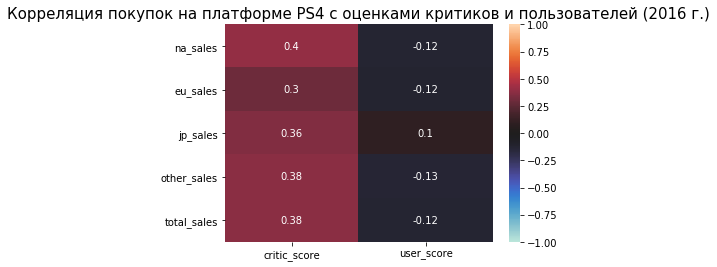

In [118]:
corr = data_2016.query('platform == "PS4"').corr()
y = ['critic_score','user_score']
x = ['na_sales','eu_sales','jp_sales','other_sales','total_sales']

corr = corr.loc[x,y]

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.index,
            center=0, annot=True, vmin=-1, vmax=1 )
plt.title("Корреляция покупок на платформе PS4 с оценками критиков и пользователей (2016 г.)", fontsize=15)
plt.show()

__Вывод:__

Оценки критиков имеют среднюю корреляцию с продажами, в то время как корреляция с оценками пользователей незначительная.

___Соотнесите выводы с продажами игр на других платформах.___


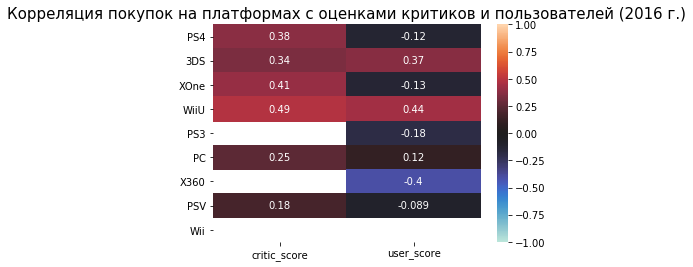

In [119]:
i_corr = pd.DataFrame()

for i in data_2016['platform'].unique():
    corr = data_2016.query('platform == @i').corr()
    x = ['total_sales']
    y = ['critic_score','user_score']
    corr = corr.loc[x,y]
    i_corr = i_corr.append(corr)

i_corr.index = data_2016['platform'].unique()
sns.heatmap(i_corr, xticklabels=i_corr.columns, yticklabels=i_corr.index,center=0, 
            annot=True, vmin=-1, vmax=1 )
plt.title("Корреляция покупок на платформах с оценками критиков и пользователей (2016 г.)", fontsize=15)
plt.show()

__Вывод:__     

На платформе PS4 и XOne - корреляция с оценками на среднем уровне, в то время как оценки людей не коррелирует с уровнем продаж. 
На платформах 3DS и WiiU - наблюдается связь дохода как к оценкам критиков, так к оценкам играющих.
Для платформы PS связь с оценками меньше, чем на других платформах.


___Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?___

In [120]:
#выделим данные после 2012 года (актуальный периуд)
data = df_games.query('year_of_release > 2012')

data = data.pivot_table(index=['genre','year_of_release'], values=
                        'total_sales', aggfunc='count')
data  = data.reset_index()

data['year_of_release'] = data['year_of_release'].astype("int")

fig = px.line(data,x = 'year_of_release', y ='total_sales', color='genre' , 
             labels={'total_sales': 'Продажи по жанрам',
                     'year_of_release':'Год выпуска игры'}, 
             title = "Динамика доходов по жанрам", height = 450 )

fig.update_layout(xaxis=dict(tickformat='d'))

fig.show()

___Вывод:___

Популярность жанров достаточно стабильна.
Однако популярность жанра Экшен падает.

In [121]:
table_genre0 = data_2016.pivot_table(index='genre', values='total_sales', aggfunc=['count','sum'])

table_genre0 = table_genre0.reset_index()
table_genre0.columns = ['genre','count','sum']
 
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=table_genre0['genre'], values=table_genre0['count'],
                     name="Выпущенные игры", textinfo='label+percent'),
              1, 1)
fig.add_trace(go.Pie(labels=table_genre0['genre'], values=table_genre0['sum'],
                     name="Доля продаж", textinfo='label+percent'),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="Жанры видеоигр в 2016 году",  height = 410,
    annotations=[dict(text='Counts', x=0.15, y=0.5, font_size=20, showarrow=False),
                 dict(text='Sales', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

___Вывод:___
* Наиболее популярный жанр - приключения, <br> при этом наибольшие продажи по другому жанру - шутеры.
* Также продажи игр спортивного жанра занимают в долю продаж 2 раза больше, чем количество игр этого жанра за 2016 год.

__Это два жанра, на которых необходимо сфокусироваться.__
* Жанр экшен игр переполнен - и чтобы его успешно вывести на рынок игру данного жанра потребуется больше усилий.

## Портрет пользователя каждого региона
<a name="4."></a>
[<font size="2">(к содержанию)</font>](#1common.)

___Самые популярные платформы (топ-5). Опишите различия в долях продаж.___

In [122]:
table_platform = df_games.query('year_of_release > 2012').pivot_table(index='platform', values=['na_sales','eu_sales',
                                                     'jp_sales','other_sales','total_sales']
                              , aggfunc='sum')

list_s = dict()
for i in ['eu_sales','jp_sales','na_sales','other_sales','total_sales']:
    list_s[i] = table_platform[i].sum()
    table_platform[i] = table_platform[i]/list_s[i]

table_platform  = table_platform.reset_index()

fig = make_subplots(rows=1, cols=3, specs=[[{'type':'xy'}, {'type':'xy'},{'type':'xy'}]])

n = 1
for i in ['eu_sales','jp_sales','na_sales']:
    temp = table_platform.sort_values(by = i, ascending = False).head(5)
    fig.add_trace(go.Bar(name=i, x=temp['platform'], y=temp[i], dy = 1), 1, n)
    n = n + 1
    
fig.update_layout(title_text="Самые популярные платформы 2013 - 2016 г в долях продаж (топ-5)", height = 400)
fig.update_yaxes(range=[0, 0.7])
fig.show()

In [123]:
table_platform = df_games.query('year_of_release == 2016').pivot_table(index='platform', values=['na_sales','eu_sales',
                                                     'jp_sales','other_sales','total_sales']
                              , aggfunc='sum')

list_s = dict()
for i in ['eu_sales','jp_sales','na_sales','other_sales','total_sales']:
    list_s[i] = table_platform[i].sum()
    table_platform[i] = table_platform[i]/list_s[i]

table_platform  = table_platform.reset_index()

fig = make_subplots(rows=1, cols=3, specs=[[{'type':'xy'}, {'type':'xy'},{'type':'xy'}]])

n = 1
for i in ['eu_sales','jp_sales','na_sales']:
    temp = table_platform.sort_values(by = i, ascending = False).head(5)
    fig.add_trace(go.Bar(name=i, x=temp['platform'], y=temp[i], dy = 1), 1, n)
    n = n + 1
    
fig.update_layout(title_text="Самые популярные платформы 2016 г в долях продаж (топ-5)", height = 400)
fig.update_yaxes(range=[0, 0.7])
fig.show()

__Вывод__

В 2016 г. Европейский и Американские рынки имеют схожие профили.
PS4 - лидирует, на втором месте XOne,

На рынке Японии с 2013- 2016 г. лидирует 3DC,
В 2016 году - PS4 поднялся на 2 место.
Чаще покупают игры на платформе PSV.


___Самые популярные жанры (топ-5). Поясните разницу.___

In [124]:
table_genre = df_games.query('year_of_release > 2012').pivot_table(index='genre', values=['na_sales','eu_sales',
                                                     'jp_sales','other_sales','total_sales']
                              , aggfunc='sum')

list_s = dict()
for i in ['eu_sales','jp_sales','na_sales','other_sales','total_sales']:
    list_s[i] = table_genre[i].sum()
    table_genre[i] = table_genre[i]/list_s[i]

table_genre  = table_genre.reset_index()

fig = make_subplots(rows=1, cols=3, specs=[[{'type':'xy'}, {'type':'xy'},{'type':'xy'}]])

n = 1
for i in ['eu_sales','jp_sales','na_sales']:
    temp = table_genre.sort_values(by = i, ascending = False).head(5)
    fig.add_trace(go.Bar(name=i, x=temp['genre'], y=temp[i]), 1, n)
    n = n + 1
fig.update_layout(title_text="Самые популярные жанры 2013-2016 г в долях продаж (топ-5)", height = 400)
fig.update_yaxes(range=[0, 0.5])
fig.show()

In [125]:
table_genre = df_games.query('year_of_release == 2016').pivot_table(index='genre', values=['na_sales','eu_sales',
                                                     'jp_sales','other_sales','total_sales']
                              , aggfunc='sum')

list_s = dict()
for i in ['eu_sales','jp_sales','na_sales','other_sales','total_sales']:
    list_s[i] = table_genre[i].sum()
    table_genre[i] = table_genre[i]/list_s[i]

table_genre  = table_genre.reset_index()

fig = make_subplots(rows=1, cols=3, specs=[[{'type':'xy'}, {'type':'xy'},{'type':'xy'}]])

n = 1
for i in ['eu_sales','jp_sales','na_sales']:
    temp = table_genre.sort_values(by = i, ascending = False).head(5)
    fig.add_trace(go.Bar(name=i, x=temp['genre'], y=temp[i]), 1, n)
    n = n + 1
fig.update_layout(title_text="Самые популярные жанры 2016 г в долях продаж (топ-5)", height = 400)
fig.update_yaxes(range=[0, 0.5])
fig.show()

__Вывод__

Рынки имеют различные профили.

Европейском рынке в 2016 году хорошо продаются Шутеры, Спортивные и Экшен игры.<br>
Японском рынке  -  Экшен и Ролевые игры.<br>
На Американском рынке с 2013 по 2016 г. лучше всего продается Экшен игры и Шутеры. (Экшен игры меньше продавались в 2016 г.)

___Влияет ли рейтинг ESRB на продажи в отдельном регионе?___

In [126]:
table = df_games.query('year_of_release > 2012').pivot_table(index='rating', values=['na_sales','eu_sales',
                                                     'jp_sales','other_sales','total_sales']
                              , aggfunc='sum')
table  = table.reset_index()

fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, 
                                            {'type':'domain'}]])

n = 1
for i in ['eu_sales','jp_sales','na_sales']:
    fig.add_trace(go.Pie(labels=table['rating'], values=table[i],
                     name=i, textinfo='label+percent'),1, n)
    n = n + 1

fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Доля продаж в среднем на игру в разбивке по рейтингам (2013 - 2016 г)", height = 400,
    annotations=[dict(text='EU', x=0.12, y=0.5, font_size=20, showarrow=False),
                 dict(text='JP', x=0.5, y=0.5, font_size=20, showarrow=False),
                 dict(text='NA', x=0.88, y=0.5, font_size=20, showarrow=False)])
fig.show()

##### __Вывод__

На Европейском и Американском почти половина продаж приходится на рейтинг М. <br>
На втором месте рейтинг E. <br>
Японском рынке хорошо продаются игры с рейтингом T. <br>

In [127]:
table_rating = df_games.query('year_of_release > 2012').pivot_table(index='rating', values=['na_sales','eu_sales',
                                                     'jp_sales','other_sales','total_sales']
                              , aggfunc='mean')

table_rating  = table_rating.reset_index()

fig = make_subplots(rows=1, cols=3, specs=[[{'type':'xy'}, {'type':'xy'},{'type':'xy'}]])

n = 1
for i in ['eu_sales','jp_sales','na_sales']:
    temp = table_rating.sort_values(by = i, ascending = False).head(5)
    fig.add_trace(go.Bar(name=i, x=temp['rating'], y=temp[i]), 1, n)
    n = n + 1
fig.update_layout(title_text="Продажи в среднем на игру в разбивке по рейтингам (2016 г)", height = 400)
fig.update_yaxes(range=[0, 0.3])

fig.show()

__Вывод__

При этом если смотреть в среднем на одну игру, <br>
Европейском и Американском рынке лучше всего продаются игры с рейтингами M и E.<br>
Японском рынке хорошо продается игры с рейтингом T и E.<br>

## Проверка гипотез
<a name="5."></a>
[<font size="2">(к содержанию)</font>](#1common.)

___Средние пользовательские рейтинги платформ Xbox One и PC одинаковые___

In [128]:
print(bold(),'\n Минимальный год \n', bold_end(),
      "PC:", round(df_games.query('platform == "PC"')['year_of_release'].min(),2), "\n",
      " XOne:", round(df_games.query('platform == "XOne"')['year_of_release'].min(),2),"")

print(bold(),'\n Средний рейтинг (2013-2016) \n', bold_end(),
      "PC:", round(df_games.query('year_of_release > 2012').query('platform == "PC"')['user_score'].mean(),2), "\n",
      " XOne:", round(df_games.query('year_of_release > 2012').query('platform == "XOne"')['user_score'].mean(),2),"")
print(bold(),'\n Выборка (2013-2016)\n', bold_end(),
      "PC:", round(df_games.query('year_of_release > 2012').query('platform == "PC"')['user_score'].count(),2), "\n",
      " XOne:", round(df_games.query('year_of_release > 2012').query('platform == "XOne"')['user_score'].count(),2),"")


 
 Минимальный год 
  PC: 1985 
  XOne: 2013 
 
 Средний рейтинг (2013-2016) 
  PC: 6.28 
  XOne: 6.52 
 
 Выборка (2013-2016)
  PC: 158 
  XOne: 182 


Средний рейтинг смотрим по переменной user_score за сравнимый период. <br>
__т.к. XOne вышла в 2013 году возьмем года 2013 - 2016.__ <br>
Исходя из средних значений по переменных, можно предположить, что средний рейтинг за текущий период не значимо различается. 
<br><br>
__Нулевая гипотеза <br>__
* Средние пользовательские рейтинги платформ Xbox One и PC значимо не различаются.<br>
* Гипотеза 2 сторонняя.

Выборка не большая, с вероятностью 99% отвергнуть точно не сможем.<br>
Попробуем с вероятностью 95%.<br>
* Используем alpha = .05

In [129]:
alpha = 0.05

results = st.ttest_ind(
    df_games[df_games["user_score"].isnull() == False].query(
        'year_of_release > 2012').query('platform == "PC"')['user_score'], 
    df_games[df_games["user_score"].isnull() == False].query(
        'year_of_release > 2012').query('platform == "XOne"')['user_score'])

print('p-значение:', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, значит средние значимо различаются.")
else:
    print("Не получилось отвергнуть нулевую гипотезу, мы не "+ 
          "знаем различаюся пользовательские рейтинги платформ Xbox One и PC или нет")

p-значение: 0.15503167687396294
Не получилось отвергнуть нулевую гипотезу, мы не знаем различаюся пользовательские рейтинги платформ Xbox One и PC или нет


___Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.___

In [130]:
print(bold(),'\n Средний рейтинг \n', bold_end(),
      "Action:", round(df_games.query('genre == "Action"')['user_score'].mean(),2), "\n",
      " Sports:", round(df_games.query('genre == "Sports"')['user_score'].mean(),2),"")
print(bold(),'\n Выборка \n', bold_end(),
      "Action:", round(df_games.query('genre == "Action"')['user_score'].count(),2), "\n",
      " Sports:", round(df_games.query('genre == "Sports"')['user_score'].count(),2),"")

print(bold(),'\n Минимальный год \n', bold_end(),
      "Action:", round(df_games.query('genre == "Action"')['year_of_release'].min(),2), "\n",
      " Sports:", round(df_games.query('genre == "Sports"')['year_of_release'].min(),2),"")

 
 Средний рейтинг 
  Action: 7.06 
  Sports: 6.96 
 
 Выборка 
  Action: 1825 
  Sports: 1101 
 
 Минимальный год 
  Action: 1980 
  Sports: 1980 


Средний рейтинг смотрим по переменной user_score за весь временной промежуток. Оба жанра присутствовали с 1980 года <br>
Исходя из средних значений переменных и размера выборки можно предположить, что средний рейтинг не значимо различается.
<br><br>
Нулевая гипотеза: <br>
* Средние пользовательские рейтинги жанров Action и Sports значимо не различаются.<br>
* Гипотеза 2 сторонняя.

Мы берем данные на много лет и они могут вносить свои коррективы. Оставим 5% шанс на ошибку<br>
Посмотрим с вероятностью 95%.<br>
* Используем alpha = .05


In [131]:
alpha = 0.05

results = st.ttest_ind(
    df_games[df_games["user_score"].isnull() == False].query('genre == "Action"')['user_score'], 
    df_games[df_games["user_score"].isnull() == False].query('genre == "Sports"')['user_score'])

print('p-значение:', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, значит средние значимо различаются.")
else:
    print("Не получилось отвергнуть нулевую гипотезу, мы не "+ 
          "знаем различаюся пользовательские рейтинги жанров Action и Sports или нет")

p-значение: 0.08310831358482085
Не получилось отвергнуть нулевую гипотезу, мы не знаем различаюся пользовательские рейтинги жанров Action и Sports или нет


__Вывод__

Мы не смогли отвергнуть гипотезы.

Мы не можем сказать отличаются ли пользовательские рейтинги.
Возможно отличается и результат может быть связан с недостаточной выборкой или значимо не отличается. Точно сказать не возможно.

##  Общий вывод и рекомендации
<a name="6."></a>
[<font size="2">(к содержанию)</font>](#1common.)

In [132]:
#подготовка графиков в выводы    
def plat():    
    fig = make_subplots(rows=1, cols=4, specs=[[{'type':'xy'}, {'type':'xy'},{'type':'xy'},{'type':'xy'}]])
    n = 1
    for i in ['total_sales','eu_sales','jp_sales','na_sales']:
        temp = table_platform.sort_values(by = i, ascending = False).head(5)
        fig.add_trace(go.Bar(name=i, x=temp['platform'], y=temp[i], dy = 1), 1, n)
        n = n + 1
    fig.update_layout(title_text="Самые популярные платформы 2016 г. (топ-5) (Доли продаж)",  height = 300)
    fig.update_yaxes(range=[0, 0.7])
    fig.show()
    
    
def plat_0():
    data = df_games.query('year_of_release > 2012')
    data = data.pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc='count')
    data  = data.reset_index()
    data['year_of_release'] = data['year_of_release'].astype("int")
    fig = px.line(data,x = 'year_of_release', y ='total_sales', color='platform' ,
                  labels={'total_sales': 'Продажи по платформам',
                          'year_of_release':'Год выпуска игры'},
                  title = "Динамика доходов по платформам (2013 - 2016 г)", height = 350 )
    fig.update_layout(xaxis=dict(tickformat='d'))
    fig.show()

In [133]:
def genre():
    fig = make_subplots(rows=1, cols=4, specs=[[{'type':'xy'}, {'type':'xy'},
                                                {'type':'xy'},{'type':'xy'}]])
    n = 1
    for i in ['total_sales','eu_sales','jp_sales','na_sales']:
        temp = table_genre.sort_values(by = i, ascending = False).head(5)
        fig.add_trace(go.Bar(name=i, x=temp['genre'], y=temp[i]), 1, n)
        n = n + 1
    fig.update_layout(title_text="Самые популярные жанры 2016 г. (топ-5) (Доли продаж)", height = 300)
    fig.update_yaxes(range=[0, 0.4])
    fig.show()

In [134]:
def corr_1():
    i_corr = pd.DataFrame()
    for i in data_2016['platform'].unique():
        corr = data_2016.query('platform == @i').corr()
        x = ['total_sales']
        y = ['critic_score','user_score']
        corr = corr.loc[x,y]
        i_corr = i_corr.append(corr)
    i_corr.index = data_2016['platform'].unique()
    i_corr = i_corr.loc[['PS4','PC','XOne'],:]
    sns.heatmap(i_corr, xticklabels=i_corr.columns, yticklabels=i_corr.index,center=0, annot=True, vmin=-1, vmax=1 )
    plt.title("Корреляция покупок на платформах  с оценками критиков и пользователей (2016 г)", fontsize=15)
    plt.show()

In [135]:
def corr_2():
    corr = data_2016.corr()
    y = ['critic_score','user_score']
    x = ['total_sales','eu_sales','jp_sales','na_sales']
    corr = corr.loc[x,y]
    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.index, center=0, annot=True, vmin=-1, vmax=1 )
    plt.title("Корреляция покупок на платформах  с оценками критиков и пользователей (2016 г)", fontsize=15)
    plt.show()

In [136]:
def rating():
    table = df_games.query('year_of_release > 2012').pivot_table(index='rating', values=['na_sales','eu_sales','jp_sales','other_sales','total_sales'], aggfunc='sum')
    table  = table.reset_index()
    fig = make_subplots(rows=1, cols=4, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'},{'type':'domain'}]])
    n = 1
    for i in ['total_sales','eu_sales','jp_sales','na_sales']:
        fig.add_trace(go.Pie(labels=table['rating'], values=table[i],
                         name=i, textinfo='label+percent'),1, n)
        n = n + 1
    fig.update_traces(hole=.4, hoverinfo="label+percent+name")
    fig.update_layout(title_text="Продажи в среднем на игру в разбивке по рейтингам (2013 - 2016 г)", 
                      height = 300,
    annotations=[dict(text='ALL', x=0.0+0.10, y=-0.5, font_size=20, showarrow=False),
                 dict(text='JP', x=0.25+0.10, y=-0.5, font_size=20, showarrow=False),
                 dict(text='EU', x=0.50+0.10, y=-0.5, font_size=20, showarrow=False),
                 dict(text='NA', x=0.75+0.10, y=-0.5, font_size=20, showarrow=False)])
    fig.show()

## Вывод
### Что поменяли или добавили в базу ?

* Привели названия столбцов к нижнему регистру 

* Заполнили пропуски в ___year_of_release*(год выпуска)*___ на основании информации из названия игры. Незаполненные кейсы удалили.

* Частично на основании информации из названия игры удалось заполнить рейтинг от организации ESRB. 

* Добавили переменную ___total_sales___ - суммарные продажи во всех регионах 


### Потенциально прибыльные платформы.




In [137]:
plat_0()

* __Популярность PS4 стремительно растет.__
* Также растет XOne, хотя и не так стремительно.
* Продажи на PC держатся на прежнем уровне. Это безопасный вариант.

In [138]:
plat()

__На PS4 бесспорный лидер по доходу, а так же как и самой высокой средней выручки за игру.
т.к в PS4 есть очень популярные игры, поэтому средняя выручка сильно отличается от медианой.__

#### Региональные особенности 

В 2016 г. Европейский и Американские рынки имеют схожие профили.
PS4 - лидирует, на втором месте XOne,

На рынке Японии с 2013- 2016 г. лидирует 3DC,
В 2016 году - PS4 поднялся на 2 место.

### Потенциально прибыльные жанры.

In [139]:
genre()

* Наиболее продаваемые жанры -  Шутеры, Экшен и Cпортивные игры.
* Популярность жанров достаточно стабильна. Лидер по популярности - Экшен.

#### Региональные особенности

Европейском рынке в 2016 году хорошо продаются Шутеры, Спортивные и Экшен игры.<br>
Японском рынке  -  Экшен и Ролевые игры.<br>
На Американском рынке с 2013 по 2016 г. лучше всего продается Экшен игры и Шутеры. (Экшен игры меньше продавались по данным 2016 г.)


### Влияние отзывов пользователей и критиков на продажи.


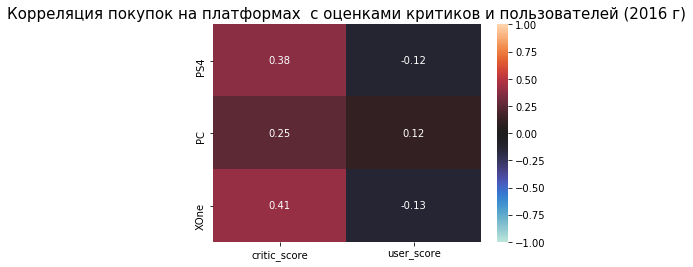

In [140]:
corr_1()


На платформе PS4 и XOne- корреляция с оценками на среднем уровне, в то время как оценки людей не коррелирует с уровнем продаж. 
Для платформы PS связь с оценками меньше, чем на других платформах

#### региональные особенности



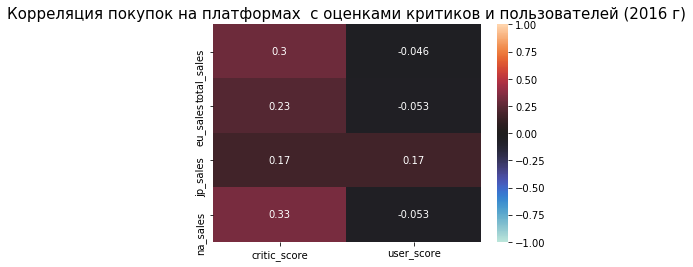

In [141]:
corr_2()

В 2016 году оценки критиков имеют корреляцию с продажами, в то время как корреляция с оценками пользователей незначительная.
Исключение составят рынок Японии, хотя в нем корреляция меньше, чем с оценками критиков.

### Влияние рейтинга ESRB на продажи в отдельном регионе.


In [142]:
rating()

* На Европейском и Американском почти половина продаж приходится на рейтинг М. <br>
* На втором месте рейтинг E. <br>
* Японском рынке хорошо продаются игры с рейтингом T. <br>

<font color='blue'> 
### Рекомендации 
</font>

* Перенасыщение играми в первом десятилетии 21 века привело к тенденции уменьшения выпуска игр.

<font color='blue'> 
___Чтобы выделится во втором десятилетии  необходимо позиционировать игру как уникальную (через инновационный концепт, графику или сюжет).___
</font>


 <font color='blue'> 
    ___Наиболее перспективная сейчас платформа PS4.___ 
    </font><br>
* Продажи игр выпущенные на ней уже входят тоp 10 по платформам (за все исследуемые года) и она на рынке всего несколько лет. (В среднем платформы активны около 10 лет.)


<font color='blue'> 
__Два жанра, на которых необходимо сфокусироваться - Шутеры и Игры спортивного жанра__
</font><br>
* Наибольшие продажи игр жанра - Шутеры. При этом доля выпущенных игр  жанра в 2016 году в 3 раза меньше, чем пропорция объема продаж.
* Также продажи игр спортивного жанра занимают долю продаж  в 2 раза больше, чем количество игр этого жанра за 2016 год.

Жанр Экшен игр также очень хорошо продается, однако конкуренция в жанре очень высокая - и чтобы его успешно вывести на рынок игру данного жанра потребуется больше усилий.